<a href="https://colab.research.google.com/github/bibhabasuiitkgp/Hyderabad_Lodging/blob/main/Lodging_Hyderabad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.5 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

In [ ]:
df=pd.read_csv('data_trends_v1-1.csv')
df.head()

,Unnamed: 0,state,city,index,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,...,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,2022-11-01,2022-12-01,2023-01-01
0,0,Andhra Pradesh,Hyderabad,all,95,93,96,93,100,93,...,41,38,38,38,37,36,39,34,35,36
1,1,Andhra Pradesh,Hyderabad,Lodging,68,56,72,68,61,60,...,37,38,40,38,36,35,35,34,36,34
2,2,Andhra Pradesh,Hyderabad,arts,100,87,75,81,88,80,...,36,36,31,26,33,31,33,27,32,35
3,3,Andhra Pradesh,Hyderabad,Dining,71,64,77,80,100,71,...,77,84,73,80,77,69,72,68,84,75
4,4,Andhra Pradesh,Hyderabad,news,54,51,58,48,49,43,...,14,16,17,21,17,16,16,11,13,13


In [ ]:
df['index'].value_counts()

all         143
Lodging     143
arts        143
Dining      143
news        143
shopping    143
travel      143
traffic     143
Name: index, dtype: int64

In [ ]:
df.set_index(['state','index','city'], inplace=True)


In [ ]:
df.columns = pd.to_datetime(df.columns, errors='coerce')
df.head()

NaT  2010-01-01  2010-02-01  2010-03-01  \
state          index   city                                                 
Andhra Pradesh all     Hyderabad    0          95          93          96   
               Lodging Hyderabad    1          68          56          72   
               arts    Hyderabad    2         100          87          75   
               Dining  Hyderabad    3          71          64          77   
               news    Hyderabad    4          54          51          58   

                                  2010-04-01  2010-05-01  2010-06-01  \
state          index   city                                            
Andhra Pradesh all     Hyderabad          93         100          93   
               Lodging Hyderabad          68          61          60   
               arts    Hyderabad          81          88          80   
               Dining  Hyderabad          80         100          71   
               news    Hyderabad          48          49          43   

                                  2010-07-01  2010-08-01  2010-09-01  ...  \
state          index   city                                           ...   
Andhra Pradesh all     Hyderabad          83          85          81  ...   
               Lodging Hyderabad          70          55          67  ...   
               arts    Hyderabad          71          70          78  ...   
               Dining  Hyderabad          80          95          81  ...   
               news    Hyderabad          41          38          40  ...   

                                  2022-04-01  2022-05-01  2022-06-01  \
state          index   city                                            
Andhra Pradesh all     Hyderabad          41          38          38   
               Lodging Hyderabad          37          38          40   
               arts    Hyderabad          36          36          31   
               Dining  Hyderabad          77          84          73   
               news    Hyderabad          14          16          17   

                                  2022-07-01  2022-08-01  2022-09-01  \
state          index   city                                            
Andhra Pradesh all     Hyderabad          38          37          36   
               Lodging Hyderabad          38          36          35   
               arts    Hyderabad          26          33          31   
               Dining  Hyderabad          80          77          69   
               news    Hyderabad          21          17          16   

                                  2022-10-01  2022-11-01  2022-12-01  \
state          index   city                                            
Andhra Pradesh all     Hyderabad          39          34          35   
               Lodging Hyderabad          35          34          36   
               arts    Hyderabad          33          27          32   
               Dining  Hyderabad          72          68          84   
               news    Hyderabad          16          11          13   

                                  2023-01-01  
state          index   city                   
Andhra Pradesh all     Hyderabad          36  
               Lodging Hyderabad          34  
               arts    Hyderabad          35  
               Dining  Hyderabad          75  
               news    Hyderabad          13  

[5 rows x 158 columns]

In [ ]:
df.reset_index()

,state,index,city,NaT,2010-01-01 00:00:00,2010-02-01 00:00:00,2010-03-01 00:00:00,2010-04-01 00:00:00,2010-05-01 00:00:00,2010-06-01 00:00:00,...,2022-04-01 00:00:00,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00
0,Andhra Pradesh,all,Hyderabad,0,95,93,96,93,100,93,...,41,38,38,38,37,36,39,34,35,36
1,Andhra Pradesh,Lodging,Hyderabad,1,68,56,72,68,61,60,...,37,38,40,38,36,35,35,34,36,34
2,Andhra Pradesh,arts,Hyderabad,2,100,87,75,81,88,80,...,36,36,31,26,33,31,33,27,32,35
3,Andhra Pradesh,Dining,Hyderabad,3,71,64,77,80,100,71,...,77,84,73,80,77,69,72,68,84,75
4,Andhra Pradesh,news,Hyderabad,4,54,51,58,48,49,43,...,14,16,17,21,17,16,16,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,West Bengal,Dining,Kalimpong,1139,0,64,42,100,0,0,...,14,15,12,14,8,7,10,12,11,12
1140,West Bengal,news,Kalimpong,1140,0,0,0,0,0,100,...,40,55,62,47,38,26,35,12,20,32
1141,West Bengal,shopping,Kalimpong,1141,0,0,0,0,0,0,...,17,17,12,6,13,11,13,12,14,10
1142,West Bengal,travel,Kalimpong,1142,21,67,75,79,71,53,...,64,100,70,47,47,43,50,46,54,46


In [ ]:
AP_hyd=df.iloc[0:7,3:]

In [ ]:
AP_hyd

2010-03-01  2010-04-01  2010-05-01  \
state          index    city                                            
Andhra Pradesh all      Hyderabad          96          93         100   
               Lodging  Hyderabad          72          68          61   
               arts     Hyderabad          75          81          88   
               Dining   Hyderabad          77          80         100   
               news     Hyderabad          58          48          49   
               shopping Hyderabad          56          53          60   
               travel   Hyderabad          79          84          98   

                                   2010-06-01  2010-07-01  2010-08-01  \
state          index    city                                            
Andhra Pradesh all      Hyderabad          93          83          85   
               Lodging  Hyderabad          60          70          55   
               arts     Hyderabad          80          71          70   
               Dining   Hyderabad          71          80          95   
               news     Hyderabad          43          41          38   
               shopping Hyderabad          54          54          57   
               travel   Hyderabad          82          72          77   

                                   2010-09-01  2010-10-01  2010-11-01  \
state          index    city                                            
Andhra Pradesh all      Hyderabad          81          85          87   
               Lodging  Hyderabad          67          65         100   
               arts     Hyderabad          78          96          78   
               Dining   Hyderabad          81          84          86   
               news     Hyderabad          40          36          48   
               shopping Hyderabad          53          70          67   
               travel   Hyderabad          78          88          90   

                                   2010-12-01  ...  2022-04-01  2022-05-01  \
state          index    city                   ...                           
Andhra Pradesh all      Hyderabad          84  ...          41          38   
               Lodging  Hyderabad          91  ...          37          38   
               arts     Hyderabad          78  ...          36          36   
               Dining   Hyderabad          90  ...          77          84   
               news     Hyderabad          48  ...          14          16   
               shopping Hyderabad          62  ...          42          48   
               travel   Hyderabad          93  ...          63          72   

                                   2022-06-01  2022-07-01  2022-08-01  \
state          index    city                                            
Andhra Pradesh all      Hyderabad          38          38          37   
               Lodging  Hyderabad          40          38          36   
               arts     Hyderabad          31          26          33   
               Dining   Hyderabad          73          80          77   
               news     Hyderabad          17          21          17   
               shopping Hyderabad          38          46          39   
               travel   Hyderabad          63          57          58   

                                   2022-09-01  2022-10-01  2022-11-01  \
state          index    city                                            
Andhra Pradesh all      Hyderabad          36          39          34   
               Lodging  Hyderabad          35          35          34   
               arts     Hyderabad          31          33          27   
               Dining   Hyderabad          69          72          68   
               news     Hyderabad          16          16          11   
               shopping Hyderabad          38          44          36   
               travel   Hyderabad          60          64          60   

                                   2022-12

In [ ]:
df_hyd=AP_hyd.T

In [ ]:
df_hyd

state      Andhra Pradesh                                                    \
index                 all   Lodging      arts    Dining      news  shopping   
city            Hyderabad Hyderabad Hyderabad Hyderabad Hyderabad Hyderabad   
2010-03-01             96        72        75        77        58        56   
2010-04-01             93        68        81        80        48        53   
2010-05-01            100        61        88       100        49        60   
2010-06-01             93        60        80        71        43        54   
2010-07-01             83        70        71        80        41        54   
...                   ...       ...       ...       ...       ...       ...   
2022-09-01             36        35        31        69        16        38   
2022-10-01             39        35        33        72        16        44   
2022-11-01             34        34        27        68        11        36   
2022-12-01             35        36        32        84        13        41   
2023-01-01             36        34        35        75        13        44   

state                 
index         travel  
city       Hyderabad  
2010-03-01        79  
2010-04-01        84  
2010-05-01        98  
2010-06-01        82  
2010-07-01        72  
...              ...  
2022-09-01        60  
2022-10-01        64  
2022-11-01        60  
2022-12-01        68  
2023-01-01        66  

[155 rows x 7 columns]

<Axes: >

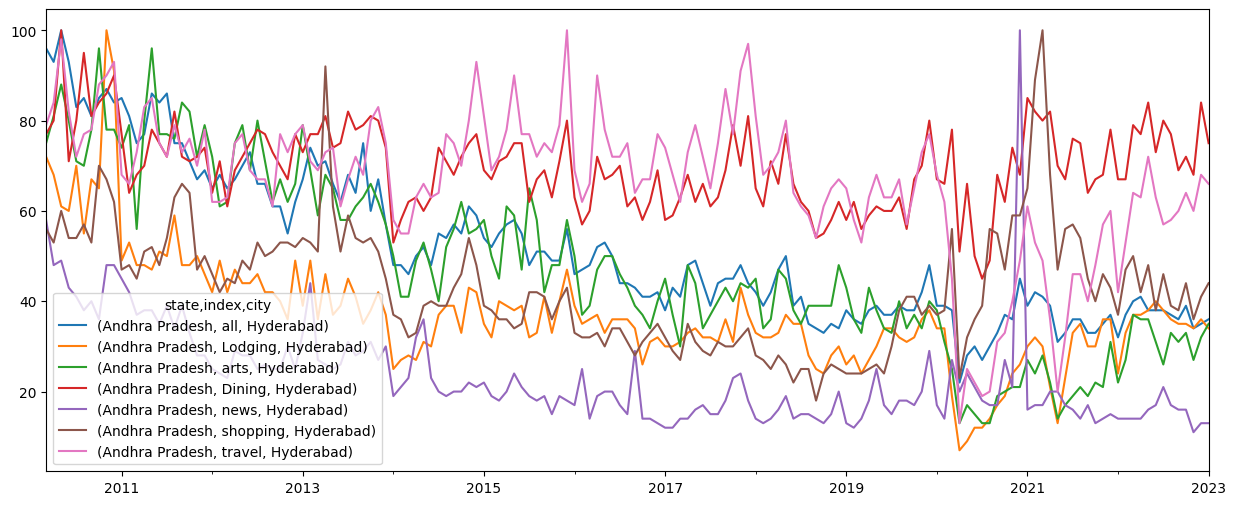

In [ ]:
df_hyd.plot(figsize=(15, 6))

<Axes: >

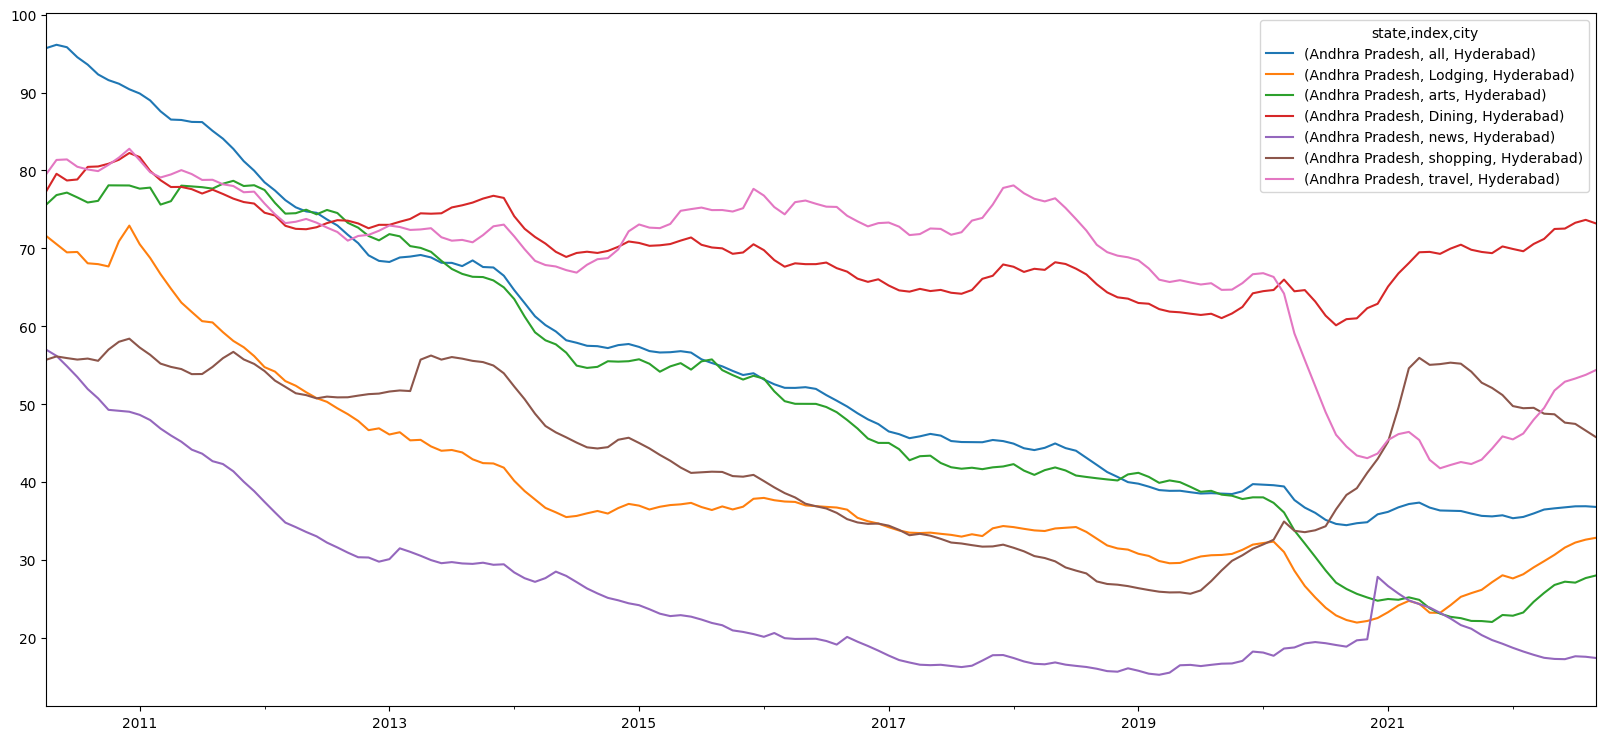

In [ ]:
df_hyd.ewm(alpha=0.1,adjust=False).mean().plot(xlim=['2010-04-01','2022-09-01'],figsize=(20,9))

<Axes: >

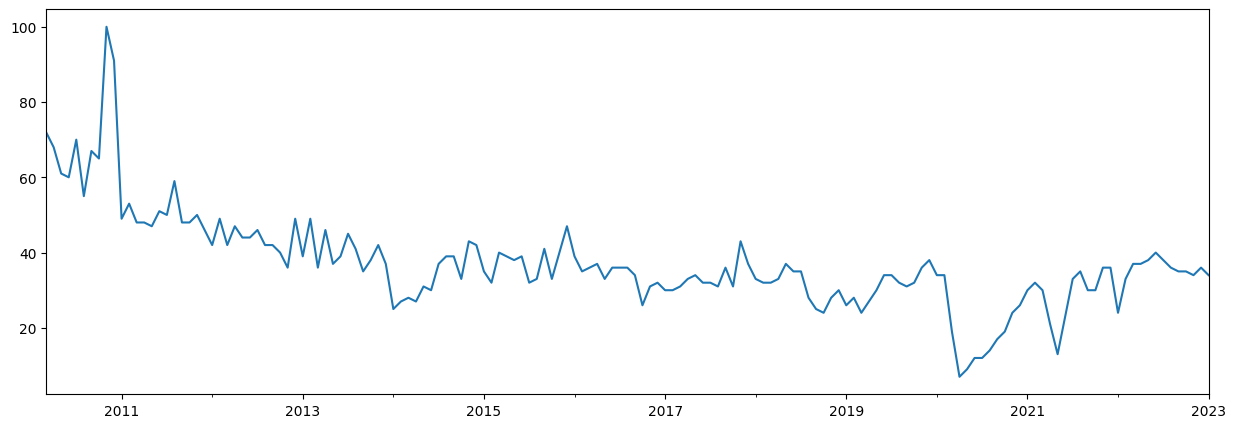

In [ ]:
df_hyd['Andhra Pradesh','Lodging','Hyderabad'].plot(figsize=(15,5))

In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2020,12,1)
test_dataset_end=datetime(2023,1,1)

In [ ]:
train_data=df_hyd[:train_dataset_end]
test_data=df_hyd[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_SARIMA=SARIMAX(train_data['Andhra Pradesh','Lodging','Hyderabad'],order=(1,2,1),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_SARIMA_fit=model_SARIMA.fit()

In [ ]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                            
======================================================================================================
Dep. Variable:     ('Andhra Pradesh', 'Lodging', 'Hyderabad')   No. Observations:                  130
Model:                        SARIMAX(1, 2, 1)x(0, 1, [], 12)   Log Likelihood                -406.571
Date:                                        Tue, 10 Oct 2023   AIC                            819.141
Time:                                                16:33:45   BIC                            827.402
Sample:                                            03-01-2010   HQIC                           822.495
                                                 - 12-01-2020                                         
Covariance Type:                                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2395      0.076     -3.147      0.002      -0.389      -0.090
ma.L1         -0.9994      2.218     -0.451      0.652      -5.346       3.347
sigma2        62.0101    137.055      0.452      0.651    -206.612     330.633
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               239.79
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2021-01-01 00:00:00
2023-01-01 00:00:00


In [ ]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2021,1,1),end=datetime(2023,1,1))
residuals=test_data['Andhra Pradesh','Lodging','Hyderabad']-pred_Sarima

In [ ]:
residuals

2021-01-01     7.881038
2021-02-01     9.790564
2021-03-01    22.693268
2021-04-01    25.597606
2021-05-01    15.501552
2021-06-01    22.405593
2021-07-01    32.309610
2021-08-01    32.213633
2021-09-01    24.117655
2021-10-01    22.021677
2021-11-01    22.925699
2021-12-01    20.829722
2022-01-01    12.614782
2022-02-01    21.428330
2022-03-01    40.235056
2022-04-01    52.043416
2022-05-01    50.851384
2022-06-01    49.659447
2022-07-01    47.467486
2022-08-01    43.275532
2022-09-01    39.083575
2022-10-01    36.891620
2022-11-01    30.699664
2022-12-01    30.507708
2023-01-01    32.196790
dtype: float64

In [ ]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-27-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


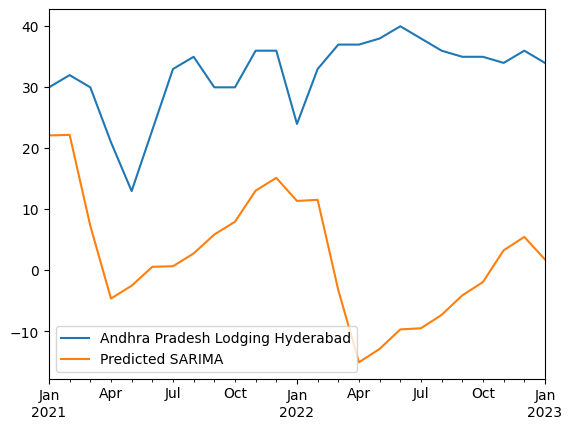

In [ ]:
test_data['Andhra Pradesh','Lodging','Hyderabad'].plot(label='Andhra Pradesh Lodging Hyderabad')
test_data['Predicted_SARIMA'].plot(label='Predicted SARIMA')

plt.legend()
plt.show()